## 問題30

In [2]:
import MeCab
mecab=MeCab.Tagger()
with open('neko.txt','r',encoding='utf-8') as neko,open('neko.txt.mecab','w',encoding='utf-8') as nekomecab:
    for line in neko.readlines():
        nekomecab.write(mecab.parse(line))

neko_mecab=[]
with open('neko.txt.mecab','r',encoding='utf-8') as neko:
    neko_sentence=[]
    for line in neko.readlines():
        if line != 'EOS\n':
            morph={'surface': '', 'base': '','pos': '','pos1':''}
            line=line.split('\t')
            morph['surface']=line[0]
            lines=line[1].split(',')
            morph['base']=lines[6]
            morph['pos']=lines[0]
            morph['pos1']=lines[1]
            neko_sentence.append(morph)
        elif neko_sentence:
            neko_mecab.append(neko_sentence)
            neko_sentence=[]
for i in range(5):
    print(neko_mecab[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生

## 問題31

In [3]:
verb_surface=[]
for neko_sentence in neko_mecab:
    for word in neko_sentence:
        if word['pos']=='動詞':
            verb_surface.append(word['surface'])
for i in range(10):
    print(verb_surface[i])
print(len(verb_surface))

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
28905


## 問題32

In [4]:
verb_base=[]
for neko_sentence in neko_mecab:
    for word in neko_sentence:
        if word['pos']=='動詞':
            verb_base.append(word['base'])
for i in range(10):
    print(verb_base[i])
print(len(verb_base))

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
28905


## 問題33

In [5]:
noun_add=[]
for neko_sentence in neko_mecab:
    for i in range(len(neko_sentence)-2):
        if neko_sentence[i]['pos']=='名詞' and neko_sentence[i+1]['surface']=='の' and neko_sentence[i+2]['pos']=='名詞':
            noun_add.append(neko_sentence[i]['surface']+neko_sentence[i+1]['surface']+neko_sentence[i+2]['surface'])
            i=i+2
for i in range(10):
    print(noun_add[i])

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親


## 問題34

In [6]:
noun_unit=[]
unit=[]
for neko_sentence in neko_mecab:
    for line in neko_sentence:
        if line['pos'] == '名詞':
            unit.append(line['surface'])
        elif len(unit)>1:
            tmp2=''
            for tmp in unit:
                tmp2=tmp2+tmp 
            noun_unit.append(tmp2)
            unit=[]
        else:
            unit=[]
for i in range(5):
    print(noun_unit[i])

人間中
一番獰悪
時妙
一毛
その後猫


## 問題35

In [7]:
word_count={}
for neko_sentence in neko_mecab:
    for word in neko_sentence:
        word_count.setdefault(word['surface'],0)
        word_count[word['surface']]+=1
word_count=sorted(word_count.items(), key= lambda x:x[1],reverse=True)
for i in range(10):
    print(word_count[i])


('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)


## 問題36

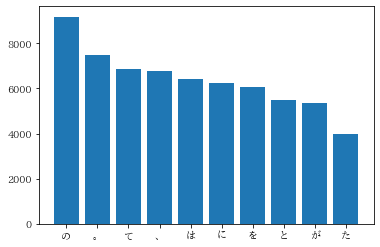

In [14]:
import numpy as np
import matplotlib.pyplot as plt

name=[]
value=[]
for i in range(10):
    name.append(word_count[i][0])
    value.append(word_count[i][1])
plt.bar(name,value)
plt.show()


## 問題37

('の', 391)
('は', 272)
('、', 252)
('に', 250)
('を', 232)
('て', 229)
('。', 209)
('と', 202)
('が', 180)
('で', 170)


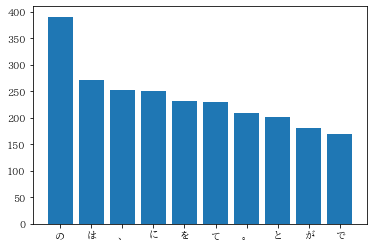

In [10]:
cat_num={}
for neko_sentence in neko_mecab:
    frag=0
    words=[]
    for word in neko_sentence:
        if word['surface'] == '猫' and not frag:
            for tmp in words:
                cat_num.setdefault(tmp,0)
                cat_num[tmp]+=1
            frag=1
        elif frag:
            cat_num.setdefault(word['surface'],0)
            cat_num[word['surface']]+=1
        else:
            words.append(word['surface'])
cat_num=sorted(cat_num.items(),key= lambda x:x[1],reverse=True)
name=[]
value=[]
for i in range(10):
    print(cat_num[i])
    name.append(cat_num[i][0])
    value.append(cat_num[i][1])
plt.bar(name,value)
plt.show()


## 問題38

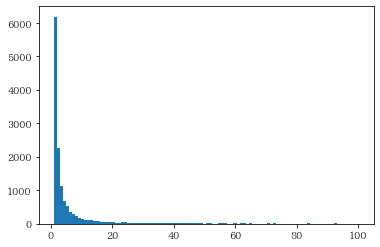

In [12]:
values=[]
for key,value in word_count:
    values.append(value)

plt.hist(values,bins=100,range=(1,100))
plt.show()


## 問題39

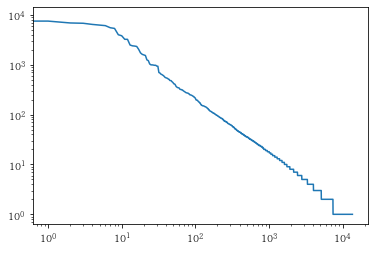

In [13]:
word_num=[]
word_rank=[]
for i,value in enumerate([x[1] for x in word_count]):
    word_num.append(value)
    word_rank.append(i)

plt.plot(word_rank,word_num)
plt.xscale('log')
plt.yscale('log')
plt.show()